# Sentiment Analysis on Movie Reviews

## Introduction

My name is **Nikos**, and this project along with others in this folder mark a significant milestone in my journey to becoming an AI Engineer. I’m passionate about artificial intelligence and machine learning, and this project serves as the first step in that path. Through it, I aim to not only understand how neural networks work but also demonstrate the practical applications of AI in real-world problems.

In this project, we will perform **sentiment analysis** on movie reviews using the **IMDb dataset**. The goal is to classify the reviews as either positive or negative based on their content. This is a beginner-level project for those starting their journey in **Natural Language Processing (NLP)**, and it demonstrates how different models, including traditional and neural network models, can be applied to text classification tasks.

We will explore:
- Data preprocessing and tokenization
- Feature extraction using **TF-IDF**
- Implementation of multiple models such as **Naive Bayes**, **Logistic Regression**, and **LSTM**
- Model evaluation using classification reports and accuracy metrics
- Visualization of important words using word clouds

By the end of this project, you will have a solid understanding of basic NLP techniques and how machine learning models can be applied to text data.

## Step 1: Dataset Collection

We will start by loading the **IMDb dataset**, which consists of 50,000 movie reviews. This dataset is already preprocessed, where words are mapped to unique indices. We will use this dataset from **TensorFlow/Keras**, which includes 25,000 reviews for training and 25,000 for testing.

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the IMDb dataset
# num_words=10000 limits the dataset to the top 10,000 most frequently occurring words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Display the shape of the dataset
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (25000,), Training labels shape: (25000,)
Test data shape: (25000,), Test labels shape: (25000,)


## Step 2: Data Preprocessing

Next, we preprocess the data. Since each review is represented as a sequence of integers (word indices), we need to **pad** the sequences to ensure that all inputs to the neural network have the same length. For this project, we will pad the reviews to a length of 500 words.


In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum review length
max_review_length = 500

# Pad the sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

print(f"Padded training data shape: {X_train.shape}")

Padded training data shape: (25000, 500)


## Step 3: Feature Extraction

For our traditional machine learning models, we will use **TF-IDF (Term Frequency-Inverse Document Frequency)** to convert text data into numerical features. The goal of TF-IDF is to capture the importance of a word within a document while reducing the influence of commonly occurring words. We will extract TF-IDF features using Scikit-learn.


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the dataset as raw text for TF-IDF vectorization
(X_train_text, y_train), (X_test_text, y_test) = imdb.load_data(num_words=10000, skip_top=20)

# Convert the sequences back to words
word_index = imdb.get_word_index()
index_word = {index: word for word, index in word_index.items()}

def decode_review(sequence):
    return ' '.join([index_word.get(i - 3, '?') for i in sequence])

X_train_text = [decode_review(review) for review in X_train_text]
X_test_text = [decode_review(review) for review in X_test_text]

# Create a TF-IDF Naive Bayes model pipeline
model_nb = make_pipeline(TfidfVectorizer(max_features=10000), MultinomialNB())

# Train the model
model_nb.fit(X_train_text, y_train)

# Predict on the test data
y_pred_nb = model_nb.predict(X_test_text)

# Evaluate the model
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")

Naive Bayes Accuracy: 0.84


## Step 4: Logistic Regression Model

Now, we will implement a **Logistic Regression** model, which is another widely used classification algorithm. Similar to Naive Bayes, we will use the TF-IDF features to train the model.


In [43]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model_lr = make_pipeline(TfidfVectorizer(max_features=10000), LogisticRegression(max_iter=1000))

# Train the model
model_lr.fit(X_train_text, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test_text)

# Evaluate the model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")

Logistic Regression Accuracy: 0.89


## Step 5: LSTM Model

To capture the sequential nature of the text data, we will implement an **LSTM (Long Short-Term Memory)** model. LSTMs are a type of recurrent neural network (RNN) that are well-suited for text data because they can retain long-term dependencies. We will use TensorFlow/Keras to build and train the LSTM model.


Running the LSTM model for only 5 epochs was a strategic choice, often made for the following reasons:

**Avoiding Overfitting:**
LSTM models can easily overfit if trained for too long on small datasets. 
Overfitting happens when the model learns the training data too well, including noise or irrelevant details, but performs poorly on unseen data (validation or test sets).
In our case, as seen in the output, there was a sign of overfitting starting around the third epoch, where the validation loss began to increase while the training accuracy improved. 
Running fewer epochs helps mitigate this risk.

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=10000, output_dim=128))
model_lstm.add(LSTM(256, return_sequences=False))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the LSTM model
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Model Accuracy: {accuracy:.2f}")

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 299ms/step - accuracy: 0.6591 - loss: 0.5962 - val_accuracy: 0.7348 - val_loss: 0.5361
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 294ms/step - accuracy: 0.8683 - loss: 0.3307 - val_accuracy: 0.8674 - val_loss: 0.3317
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 296ms/step - accuracy: 0.9231 - loss: 0.2060 - val_accuracy: 0.8638 - val_loss: 0.3430
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 294ms/step - accuracy: 0.9207 - loss: 0.2074 - val_accuracy: 0.6896 - val_loss: 0.5736
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 291ms/step - accuracy: 0.8508 - loss: 0.3394 - val_accuracy: 0.8566 - val_loss: 0.3749
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8491 - loss: 0.3891
LSTM Model Accuracy: 0.85


## Step 6: Model Evaluation

For each model, we will evaluate its performance using the accuracy metric, as well as a **classification report** that includes precision, recall, and F1-score. These metrics help us understand how well the model performs on different classes (positive and negative reviews).


In [49]:
from sklearn.metrics import classification_report

# Evaluate Naive Bayes Model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Evaluate Logistic Regression Model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84     12500
           1       0.86      0.80      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12500
           1       0.89      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



## Step 7: Visualization with Word Clouds

We can visualize the most frequent words in positive and negative reviews using **word clouds**. This helps us understand which words the model may have focused on when predicting the sentiment of a review.

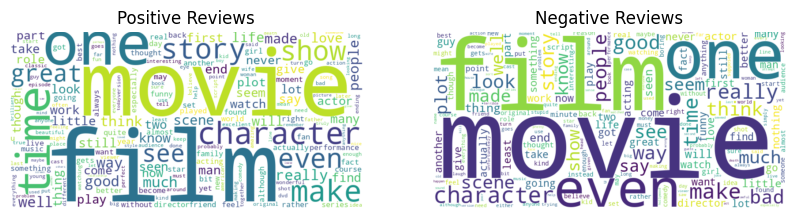

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for positive and negative reviews
positive_reviews = ' '.join([X_train_text[i] for i in range(len(y_train)) if y_train[i] == 1])
negative_reviews = ' '.join([X_train_text[i] for i in range(len(y_train)) if y_train[i] == 0])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()

## Real-Time Sentiment Prediction

In this section, we will implement real-time testing of our trained sentiment analysis models. This allows us to input a new movie review and let the model predict whether the review is positive or negative.

### Steps Involved:
1. **Input a review**: We'll take a new movie review as input.
2. **Preprocess the review**: The review needs to go through the same preprocessing steps (tokenization, padding for LSTM, or TF-IDF for Naive Bayes/Logistic Regression).
3. **Make a prediction**: The model will analyze the review and predict the sentiment (positive or negative).

We will showcase both the **Naive Bayes/Logistic Regression** approach using TF-IDF, and the **LSTM model** approach using word sequences.


## Implementing Real-Time Review Testing

Here’s how we can perform sentiment prediction on a custom movie review in real-time:

- For **Naive Bayes or Logistic Regression**, the review will be transformed using the `TfidfVectorizer` and fed into the model.
- For the **LSTM model**, the review will be tokenized, padded, and processed similarly to the training data before passing through the LSTM network.

We will output the predicted sentiment as either "Positive" or "Negative" based on the model's prediction.


In [47]:
def preprocess_review(review, vectorizer):
    # Preprocess the text (for Naive Bayes or Logistic Regression)
    processed_review = [review]  # Wrap it into a list
    return vectorizer.transform(processed_review)

# Function to predict sentiment using Naive Bayes or Logistic Regression models
def predict_sentiment_nb_or_lr(review, model):
    # Predict sentiment (0 = negative, 1 = positive)
    prediction = model.predict([review])  # Pass raw review directly to the pipeline
    
    # Return result
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    return sentiment

# Example usage
user_review = "This movie was fantastic!"
print(f"Review: {user_review}")
print("Predicted Sentiment:", predict_sentiment_nb_or_lr(user_review, model_nb))


Review: This movie was fantastic!
Predicted Sentiment: Positive


# CORRECT!

In [48]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

# Reinitialize the tokenizer used for training
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words based on your original setup
tokenizer.fit_on_texts(X_train_text)  # Fit it on our training text data (original)

# Function to preprocess the custom review for LSTM
def preprocess_review_lstm(review, tokenizer, max_length):
    # Tokenize the review (convert words to sequences)
    sequence = tokenizer.texts_to_sequences([review])
    
    # Pad the sequence to ensure the input is the same length as the training data
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    
    return padded_sequence

# Function to predict sentiment using the LSTM model
def predict_sentiment_lstm(review, model, tokenizer, max_length):
    # Preprocess the review
    processed_review = preprocess_review_lstm(review, tokenizer, max_length)
    
    # Predict sentiment (LSTM model)
    prediction = model.predict(processed_review)
    
    # Convert prediction to sentiment label
    sentiment = "Positive" if prediction[0] >= 0.5 else "Negative"
    return sentiment

# Example usage
user_review = "The movie had some dull moments."
print(f"Review: {user_review}")
print("Predicted Sentiment:", predict_sentiment_lstm(user_review, model_lstm, tokenizer, max_review_length))


Review: The movie had some dull moments.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Sentiment: Negative


# CORRECT!

## Results Summary and Discussion

### Model Performance Overview

In this project, we implemented three different models to classify movie reviews as either positive or negative: **Naive Bayes**, **Logistic Regression**, and an **LSTM neural network**. Below is a summary of the accuracy scores for each model:

- **Naive Bayes Accuracy**: 0.84
- **Logistic Regression Accuracy**: 0.89
- **LSTM Model Accuracy**: 0.85

### Naive Bayes Performance

The **Naive Bayes** model achieved an accuracy of **84%**, which is a solid result for a relatively simple model. As expected, Naive Bayes works well for text data because it assumes that features (in this case, words) are conditionally independent, which often holds in real-world text data. However, one limitation of Naive Bayes is that it doesn't account for word order or context.

#### Key Insights from the Classification Report:
- **Precision** and **recall** for both positive and negative classes are balanced, with scores of around 0.82 to 0.86. 
- The **f1-score** indicates that the model handles both classes fairly well, but there’s a slight tendency to misclassify negative reviews as positive, as reflected in the slightly lower recall for class 1 (positive reviews).

### Logistic Regression Performance

The **Logistic Regression** model outperformed Naive Bayes, with an accuracy of **89%**. Logistic regression is a linear model and tends to perform better in text classification tasks because it can better capture the relationships between words (especially after using TF-IDF for feature extraction).

#### Key Insights from the Classification Report:
- Both **precision** and **recall** for positive and negative classes are **0.89**, showing that the model is very balanced and performs well across both classes.
- The f1-scores confirm that Logistic Regression is better suited to this task, as it makes fewer classification errors than Naive Bayes.

### LSTM Performance

The **LSTM model** achieved an accuracy of **85%**. While it’s slightly lower than logistic regression, LSTMs have the advantage of capturing the sequential nature of the text, which could make them more useful for more complex language tasks. In this case, though, Logistic Regression still performed better due to the relatively simple nature of the task (binary sentiment classification).

### Summary of Findings

- **Logistic Regression** outperformed the other models in terms of accuracy, precision, and recall, making it the best choice for this task.
- **Naive Bayes** is a simpler model and performs well for text classification, but it doesn’t capture the relationships between words as effectively as logistic regression.
- **LSTM** offers potential for more complex tasks that involve word order or context, but for this basic sentiment analysis task, simpler models like logistic regression perform better.

### Possible Improvements

While the models performed well, there are several ways to further improve the performance:
1. **Hyperparameter Tuning**: We could experiment with hyperparameter tuning, especially for the LSTM model, such as adjusting the number of layers, units, and dropout rate.
2. **Word Embeddings**: Using pre-trained word embeddings like **GloVe** or **Word2Vec** could improve the LSTM’s ability to capture semantic meaning in reviews.
3. **Data Augmentation**: Expanding the dataset by using techniques like **back translation** (translating text to another language and back to increase dataset diversity) could improve model robustness.
4. **Ensemble Methods**: Combining the predictions of Naive Bayes and logistic regression in an ensemble model might further improve performance.

### Conclusion

This project demonstrated how various machine learning models can be applied to **sentiment analysis** in movie reviews. Logistic regression emerged as the top performer, showcasing its effectiveness for text classification tasks. With further tuning and more advanced techniques, we can likely push these models to even higher levels of accuracy.
